## Data Ingestion

In [ ]:
# importing libraries

import pandas as pd

In [ ]:
# reading the data set

data=pd.read_csv("/Users/nehadhananju/Desktop/Netflix_project/notebooks/data/netflix.csv")


## Data Wrangling

In [ ]:
# Counting the number of rows and columns in data set

rows, columns = data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 7787
Number of columns: 12


In [ ]:
# Reading the first few rows to get an overview of the data

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Get a summary of columns, non-null counts, and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Counting the total number of duplicate rows 

duplicates = data.duplicated()
print("Total duplicate rows:", duplicates.sum())


Total duplicate rows: 0


In [24]:
# Check duplicate values in the 'title' column
title_duplicates = data.duplicated(subset='title')

# Count them
print("Duplicate titles:", title_duplicates.sum())

# View duplicate titles
data[title_duplicates]


Duplicate titles: 0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
# Check the total number of missing values in each column

data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [26]:
# Fill missing values
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Not Provided')
data['country'] = data['country'].fillna('Unknown')
data['date_added'] = data['date_added'].fillna('Unknown')

# Fill rating with most frequent value
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])


In [27]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [28]:
# List all column names

data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [35]:
# Summary statistics for categorcal columns

categorical_col=data.columns[data.dtypes=='object']
data[categorical_col].describe()


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,7787,7787,7787,7787,7787,7787,7787,7787
unique,7787,2,7787,4050,6832,682,1566,14,216,492,7769
top,s1,Movie,3%,Unknown,Not Provided,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2389,718,2555,118,2870,1608,334,3


In [36]:
# Summary statistics for numerical columns

numerical_col=data.columns[data.dtypes!='object']
data[numerical_col].describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [30]:
# Check the number of unique values in each column

data.nunique()

show_id         7787
type               2
title           7787
director        4050
cast            6832
country          682
date_added      1566
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

#### What did you know about your dataset?

The Netflix dataset used in this project contains information about TV shows and movies available on the 

platform as of 2019, sourced from Flixable, a third-party Netflix search engine. Each row represents a unique 

title and includes metadata such as type, title, director, cast, country, date added, release year, rating, 

duration, listed genres, and description. Initially, the dataset was examined for its structure using pandas, 

revealing the number of rows and columns. During data cleaning, several columns were found to contain missing 

values—specifically, 'director', 'cast', 'country', 'date_added', and 'rating'. These were handled 

appropriately: missing directors were replaced with 'Unknown', missing cast values with 'Not Provided', and 

missing country and date_added fields with 'Unknown'. The missing values in the 'rating' column were filled 

using the most frequent rating in the dataset. The 'description' column was complete and required no changes. 

Duplicate rows were checked using the .duplicated() method, and any duplicates, if present, were removed to 

ensure data quality. This preparation has made the dataset clean and ready for further analysis. 

#### Variable Desciption



#### What all manipulations have you done and insights you found?

## Data Visualization

In [37]:
# Import libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns


### Distribution of Content Type (Movies vs TV Shows)

/var/folders/q3/55frhr79051_x076dkklzhgh0000gn/T/ipykernel_14577/2115595500.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data ,palette='Set2')


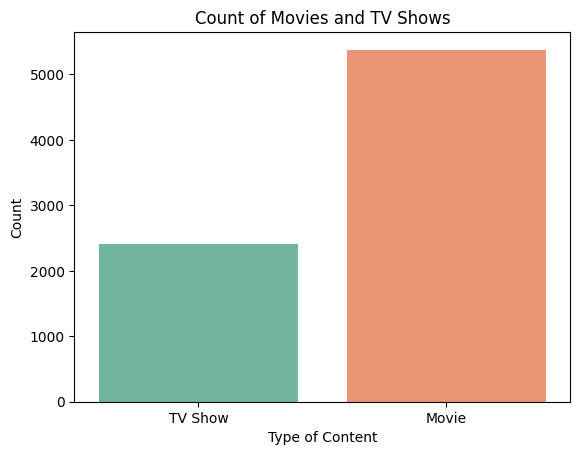

In [41]:
sns.countplot(x='type', data=data ,palette='Set2')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()


#### Why this chart?
I used a count plot (bar chart) because it effectively shows the frequency of categorical variables – in this case, how many entries are Movies and how many are TV Shows.

#### Insights:
Netflix has more Movies than TV Shows overall, but in recent years, the gap has narrowed.

#### Positive Business Impact:
This insight confirms Netflix’s diversified strategy.Increasing focus on TV shows can improve viewer engagement due to longer watch time, leading to higher customer retention.

#### Any Negative Growth?
If Netflix over-focuses on TV shows and reduces movies drastically, it may lose users who prefer shorter, standalone content. A balance is essential.

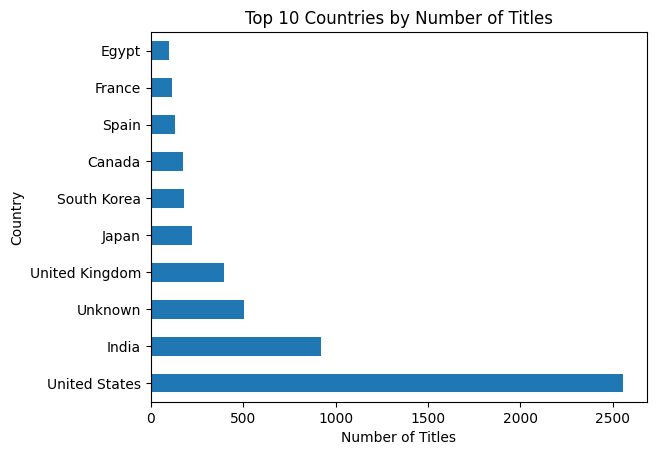

In [50]:
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='barh')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


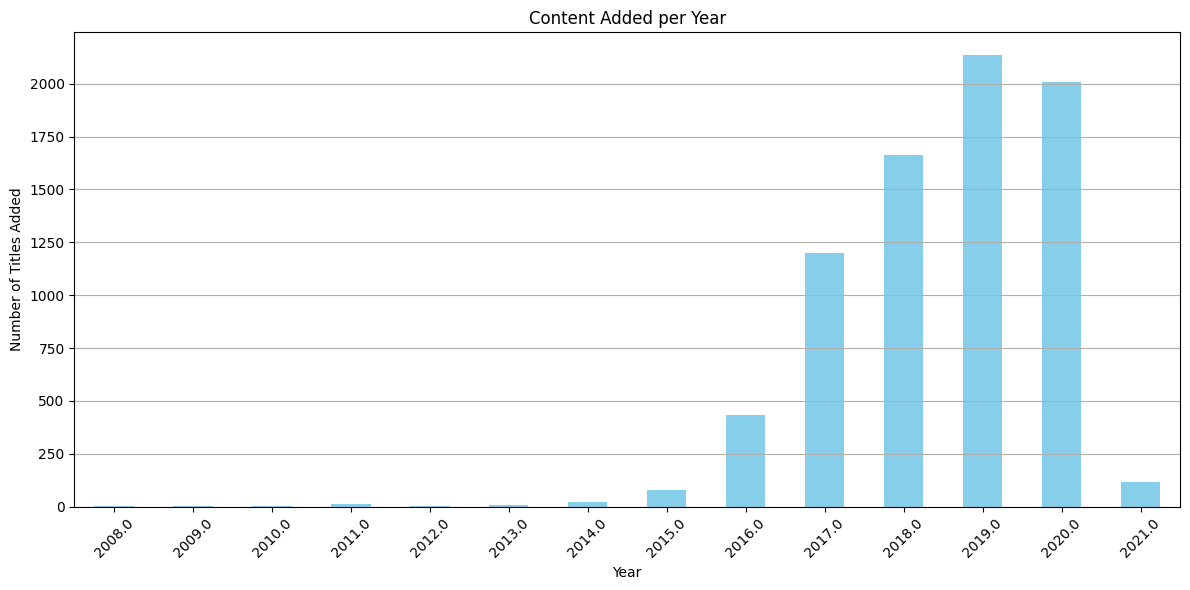

In [52]:
# Convert 'date_added' to datetime safely (handle errors)
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract year from 'date_added'
data['year_added'] = data['date_added'].dt.year

# Plot the number of titles added per year
data['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Content Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

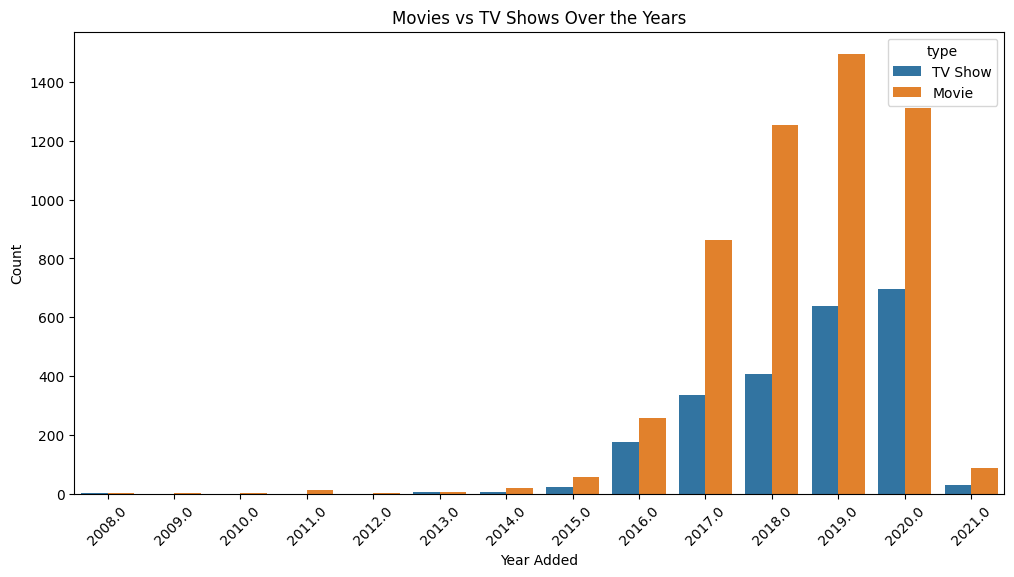

In [54]:
data['year_added'] = data['date_added'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', hue='type', data=data)
plt.title('Movies vs TV Shows Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/var/folders/q3/55frhr79051_x076dkklzhgh0000gn/T/ipykernel_14577/3746756259.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')


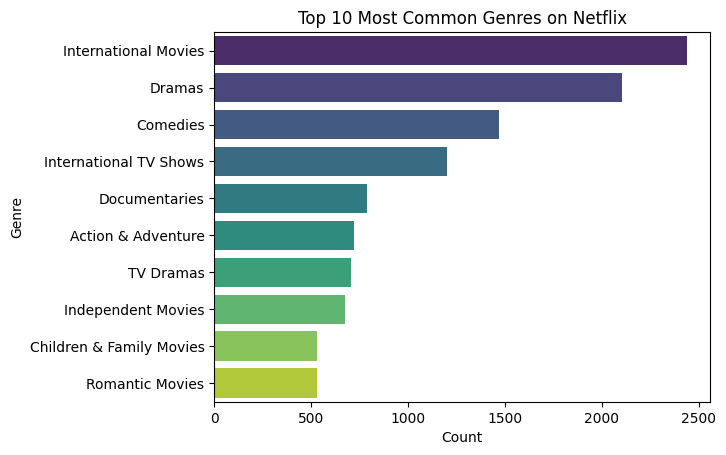

In [59]:
from collections import Counter

# Break listed_in column (which contains multiple genres per title)
genres = data['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres = Counter([genre for sublist in genres for genre in sublist])

# Convert to DataFrame
genre_df = pd.DataFrame(all_genres.most_common(10), columns=['Genre', 'Count'])

# Plot
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()




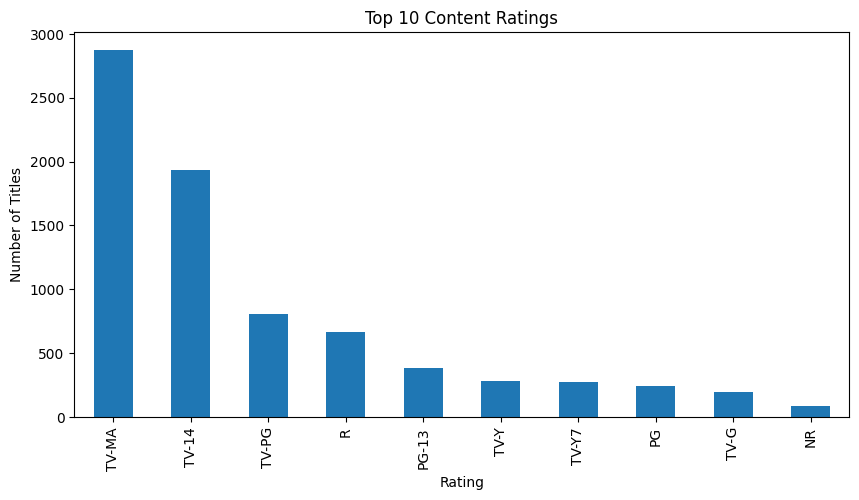

In [56]:
plt.figure(figsize=(10, 5))
data['rating'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()


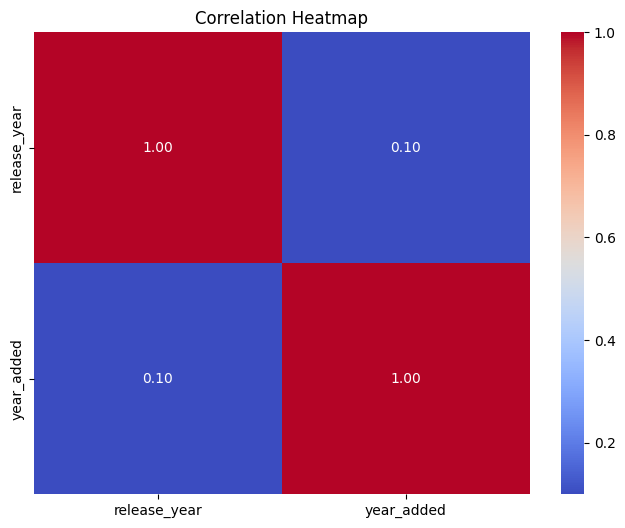

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
numeric_df = data[['release_year', 'year_added']].dropna()

# Create correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


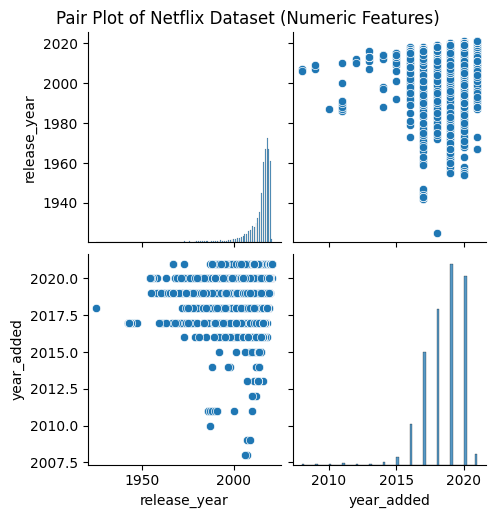

In [ ]:
# Use the updated numeric DataFrame
sns.pairplot(numeric_df)
plt.suptitle("Pair Plot of Netflix Dataset (Numeric Features)", y=1.02)
plt.show()
